In [41]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns='Outcome')  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (614, 8)
Test set size: (154, 8)


Random Forest Accuracy: 0.7208

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



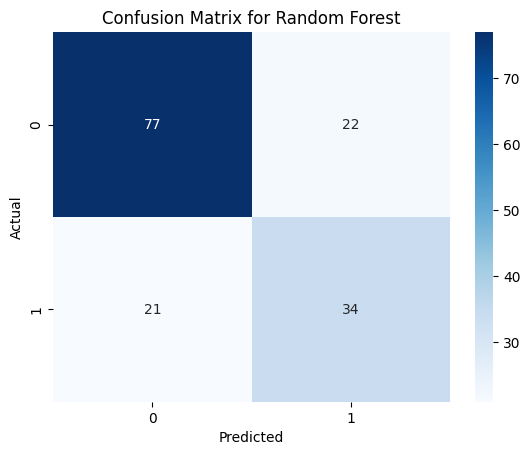

In [44]:
# Train a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Decision Tree Accuracy: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



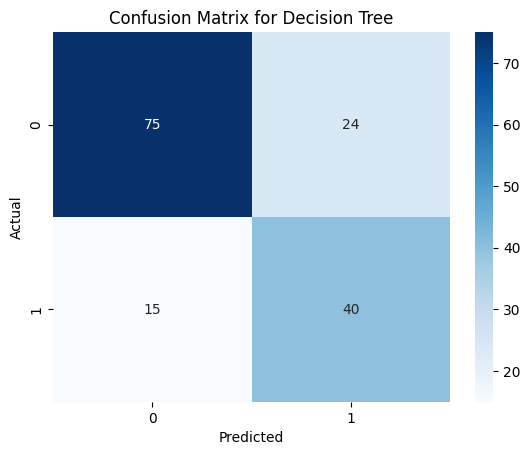

In [45]:
# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

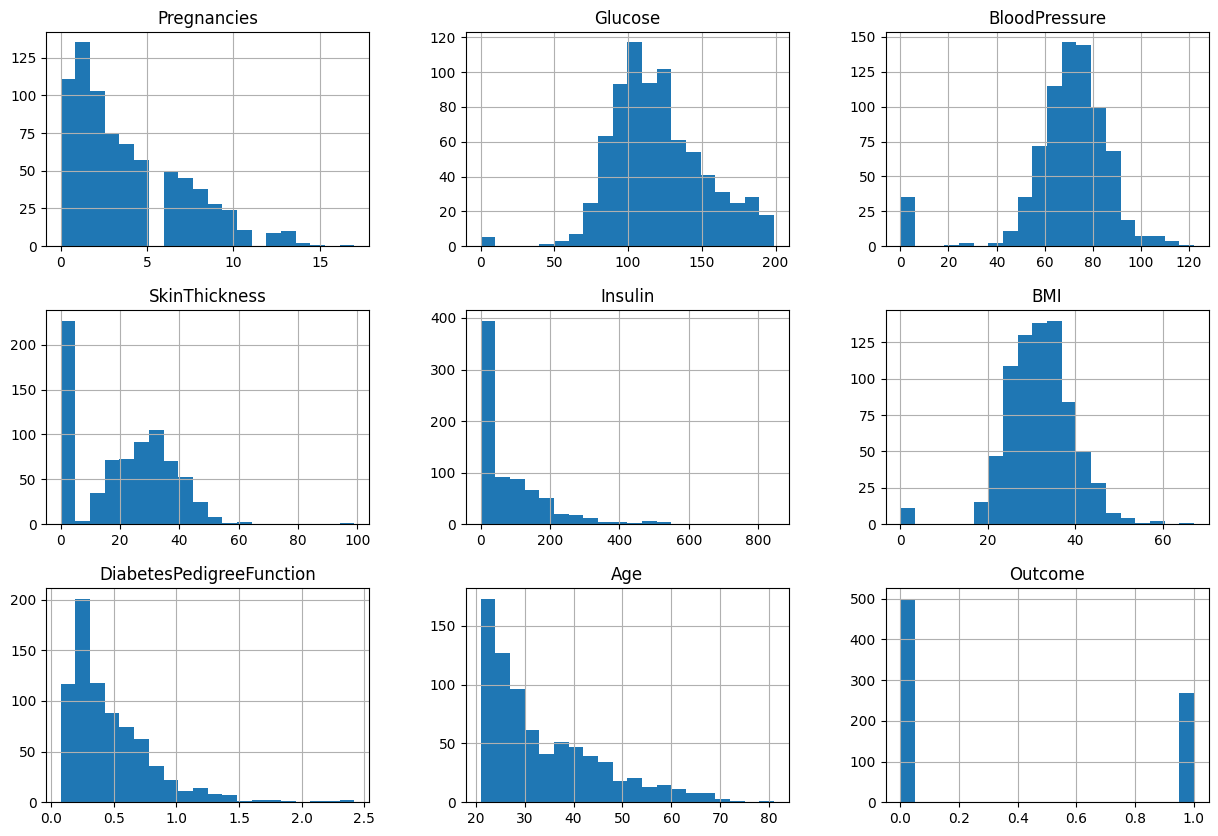

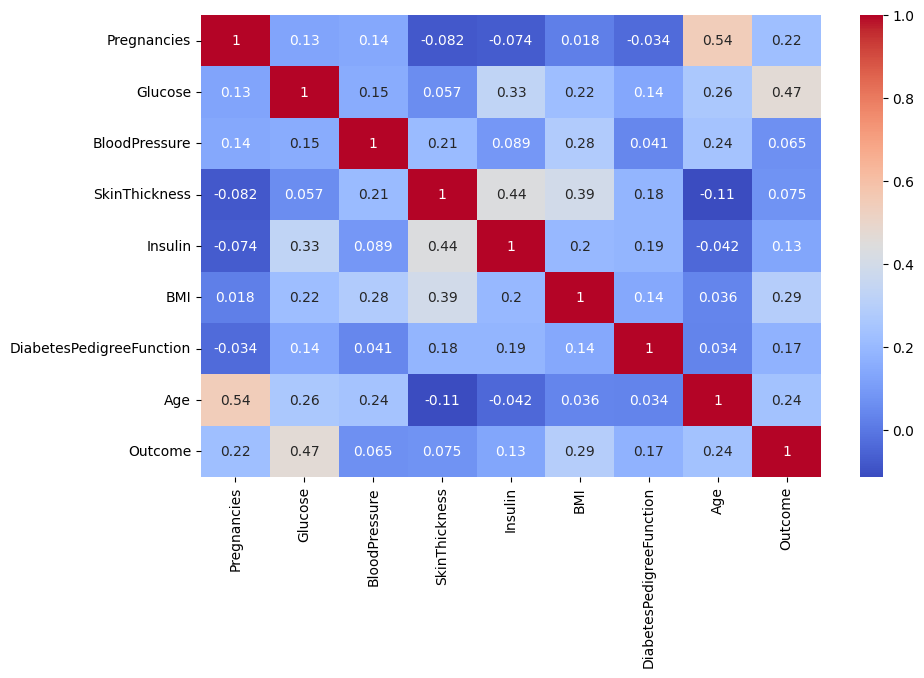

In [46]:
# Basic statistics summary
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of each variable
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

In [48]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}


In [49]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [50]:
# Get the best model
best_xgb_model = grid_search.best_estimator_

In [51]:
# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

In [52]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7468


In [53]:
# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [54]:
# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

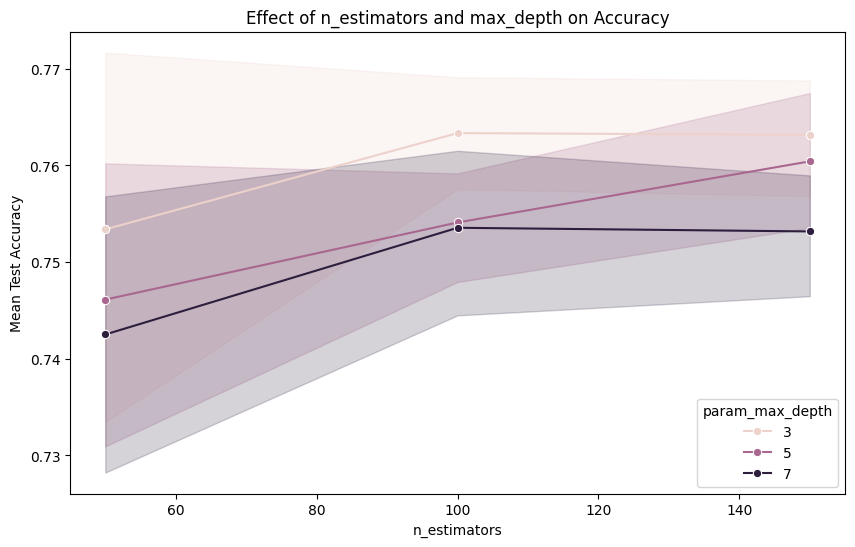

In [55]:
# Plot results for n_estimators vs accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('Effect of n_estimators and max_depth on Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.show()

In [56]:
# Create the directory if it doesn't exist
model_dir = './models/'
os.makedirs(model_dir, exist_ok=True)

# Save the model using joblib
model_path = os.path.join(model_dir, 'xgb_model.pkl')
joblib.dump(best_xgb_model, model_path)

print(f"Model saved at {model_path}")

Model saved at ./models/xgb_model.pkl


In [57]:
# Load the model from the saved file
loaded_model = joblib.load(model_path)

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test)

In [58]:
# Initialize and train the XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)


# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss')  # Removed "use_label_encoder" to avoid the warning

# Train the model
xgboost_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(xgboost_model, './models/xgb_model.pkl')
# Assuming decision_tree, random_forest, and xgboost are trained models
joblib.dump(decision_tree, './models/decision_tree_model.pkl')
joblib.dump(random_forest, './models/random_forest_model.pkl')
joblib.dump(xgboost_model, './models/xgb_model.pkl')

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['./models/xgb_model.pkl']

In [60]:
decision_tree_model = joblib.load('./models/decision_tree_model.pkl')
random_forest_model = joblib.load('./models/random_forest_model.pkl')
xgboost_model = joblib.load('./models/xgb_model.pkl')

In [61]:
# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)

In [62]:
# Evaluate each model
models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

In [63]:
# Function to print classification report and accuracy
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


--- Decision Tree ---
Accuracy: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:


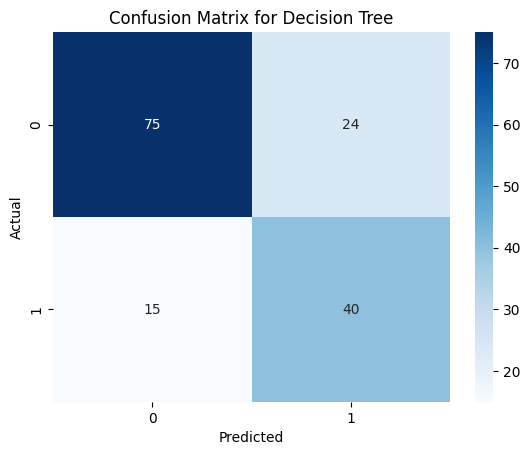

--- Random Forest ---
Accuracy: 0.7208

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:


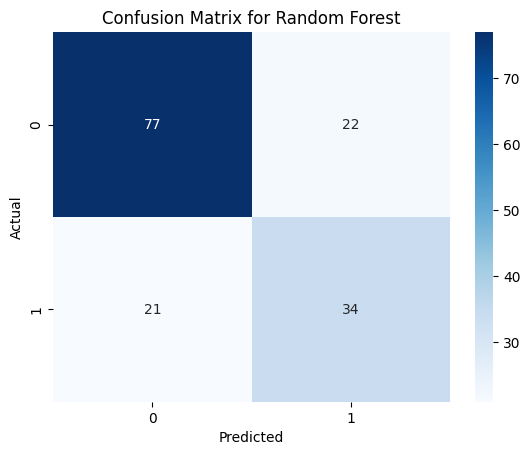

--- XGBoost ---
Accuracy: 0.7078

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154


Confusion Matrix:


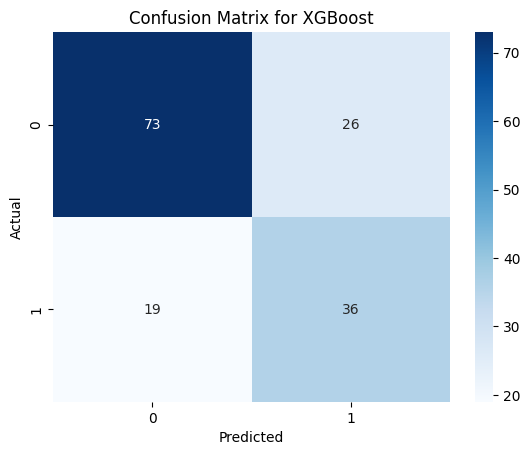

In [64]:
# Evaluate each model
for model_name, y_pred in models.items():
    evaluate_model(model_name, y_test, y_pred)